In [73]:
import numpy as np 
import matplotlib.pyplot as plt

from helpers.plotting import newplot, hist_with_outline, hist_with_errors, function_with_band
use_latex = False

# scipy polyfit
from scipy.optimize import curve_fit


(793.750041597028, 928.5806368257563)

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

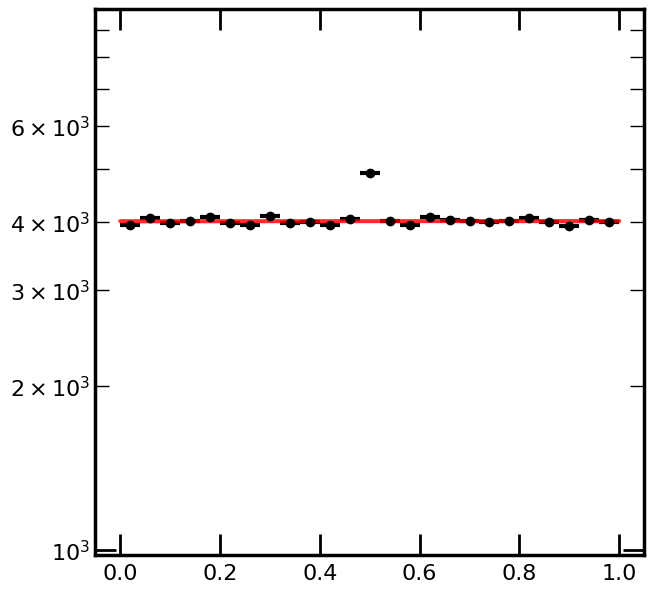

In [74]:
N_bins = 25
signal_region = (0.4, 0.6)
N_experiments = 1000

def total_s(fit, hist):
    
    # Get hist only on the signal region
    hist = hist[(bin_centers > signal_region[0]) & (bin_centers < signal_region[1])]
    fit = fit[(bin_centers_range > signal_region[0]) & (bin_centers_range < signal_region[1])]

    return np.sum(hist) - np.sum(fit)

def total_positive_s(fit, hist):

    hist = hist[(bin_centers > signal_region[0]) & (bin_centers < signal_region[1])]
    fit = fit[(bin_centers_range > signal_region[0]) & (bin_centers_range < signal_region[1])]

    diff = hist - fit
    diff = diff[diff > 0]
    return np.sum(diff)

def experiment(N_samples, plot = False):

    # generate random data
    data = np.random.uniform(0, 1, N_samples)

    signal_fraction = 0.01
    signal_data = np.random.normal(0.5, 0.01, int(N_samples*signal_fraction))
    data = np.concatenate((data, signal_data))

    # histogram
    counts, bin_edges = np.histogram(data, bins = N_bins, range = (0,1))
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    bin_centers_range = (bin_centers > signal_region[0]) & (bin_centers < signal_region[1])
    bin_centers_range = bin_centers[bin_centers_range]
    bin_centers_anti_range = (bin_centers < signal_region[0]) | (bin_centers > signal_region[1])
    counts_anti_range = counts[bin_centers_anti_range]
    bin_centers_anti_range = bin_centers[bin_centers_anti_range] 

    # fit
    def fit_function(x, a, b):
        return a + b*x

    popt, pcov = curve_fit(fit_function, bin_centers_anti_range, counts_anti_range, p0 = [0, 0])
    fit = fit_function(bin_centers_range, *popt)

    # Plot
    if plot:
        fig, ax = newplot("full", use_tex = use_latex)
        hist_with_errors(ax, data, N_bins, range = (0,1), color = "black", label = "Data")
        function_with_band(ax, fit_function, (0,1), popt, pcov, color = "red", label = "Fit")

        plt.yscale("log")

        plt.ylim(0.2*np.max(counts), 2*np.max(counts))


    return total_s(fit, counts), total_positive_s(fit, counts)



experiment(100000, plot = True)




In [75]:
n_samples = np.logspace(0, 6, 7)

signals = np.zeros((len(n_samples), N_experiments))
positive_signals = np.zeros((len(n_samples), N_experiments))

for i, N in enumerate(n_samples):

    for j in range(N_experiments):
        signals[i,j], positive_signals[i,j] = experiment(int(N))
            
        print(f"Finished experiment {i+1} of {len(n_samples)}")

        

Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
Finished experiment 1 of 7
F

/tmp/ipykernel_1114859/2019739033.py:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fit_function, bin_centers_anti_range, counts_anti_range, p0 = [0, 0])


Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
Finished experiment 2 of 7
F

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1114859/394506659.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("Estimated Signal / $\sqrt{N_{samples}}$")
findfont: Generic family 'serif' not found because none of the following families were found: CM


findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM


[ 1.87500001e-02 -6.25000019e-03  8.42500000e-01  9.68250000e+00
  9.84587500e+01  1.00156375e+03  9.99402250e+03] [  0.51352793   1.54261092   4.9130127   15.73518569  48.33720594
 167.69047887 488.8270095 ]
[ 0.215       0.43341479  0.45821826  0.63316941  1.30113368  3.43314323
 10.18844744] [0.41082235 0.32541725 0.31418531 0.3366415  0.33218517 0.3829021
 0.39167668]


findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

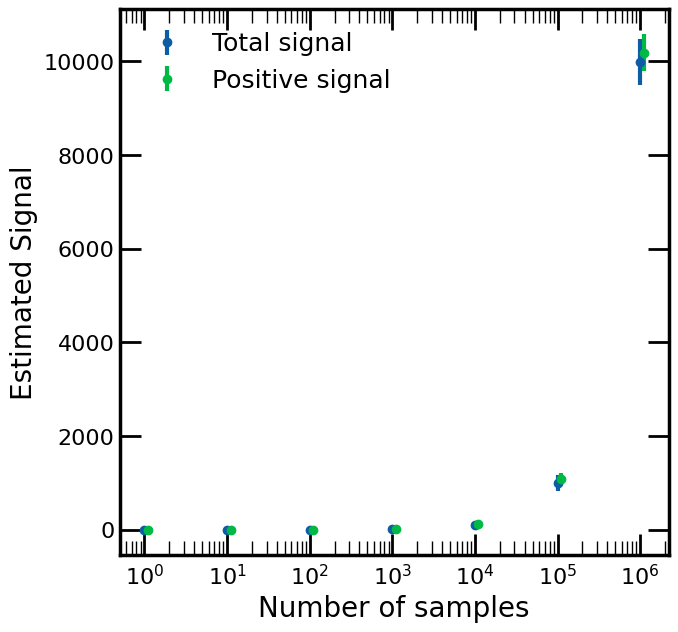

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

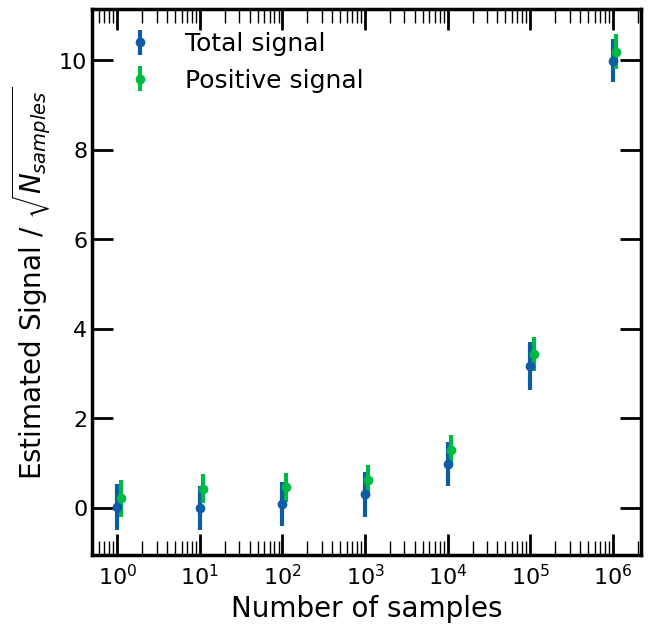

In [76]:
signals_mean = np.mean(signals, axis = 1)
signals_std = np.std(signals, axis = 1)

positive_signals_mean = np.mean(positive_signals, axis = 1)
positive_signals_std = np.std(positive_signals, axis = 1)


fig, ax = newplot("full", use_tex = use_latex)
ax.errorbar(n_samples, signals_mean , yerr = signals_std  , fmt = "o", label = "Total signal")
ax.errorbar(n_samples * 1.1, positive_signals_mean  , yerr = positive_signals_std   , fmt = "o", label = "Positive signal")
ax.set_xscale("log")
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Estimated Signal")


fig, ax = newplot("full", use_tex = use_latex)
ax.errorbar(n_samples, signals_mean / np.sqrt(n_samples), yerr = signals_std  / np.sqrt(n_samples) , fmt = "o", label = "Total signal")
ax.errorbar(n_samples * 1.1, positive_signals_mean  / np.sqrt(n_samples) , yerr = positive_signals_std  / np.sqrt(n_samples) , fmt = "o", label = "Positive signal")
ax.set_xscale("log")
plt.legend()
plt.xlabel("Number of samples")
plt.ylabel("Estimated Signal / $\sqrt{N_{samples}}$")

print(signals_mean, signals_std)
print(positive_signals_mean / np.sqrt(n_samples), positive_signals_std / np.sqrt(n_samples))

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

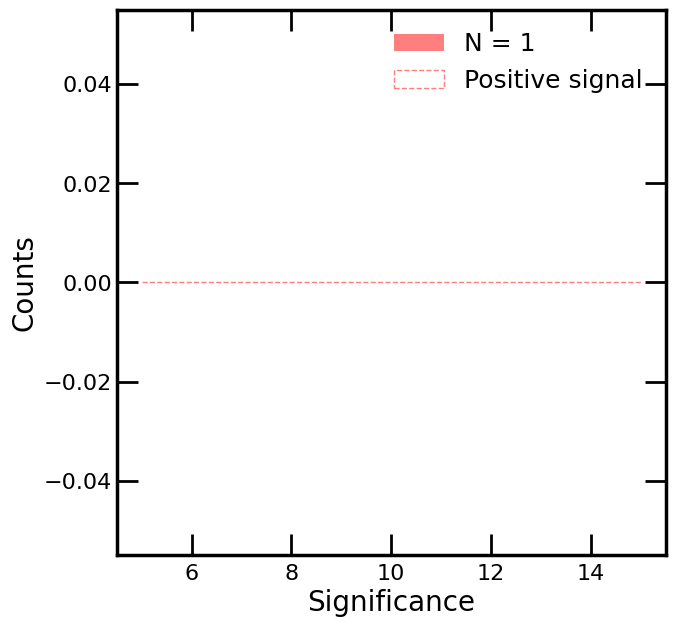

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

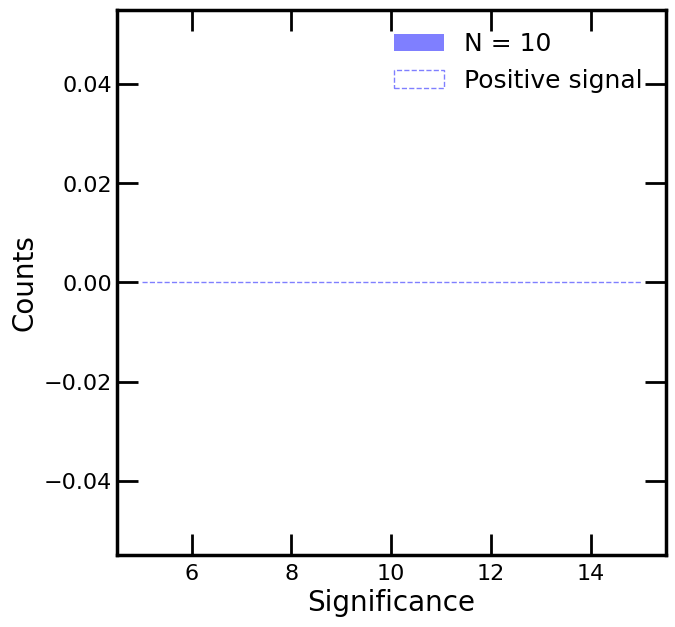

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

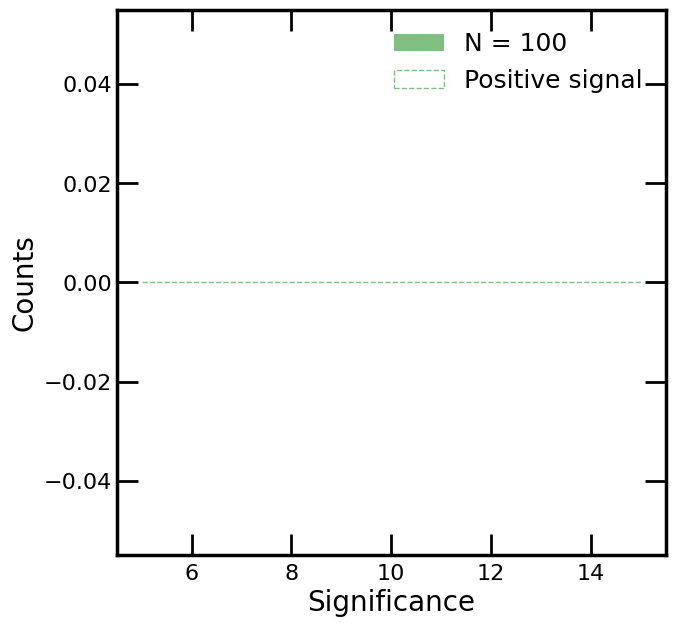

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

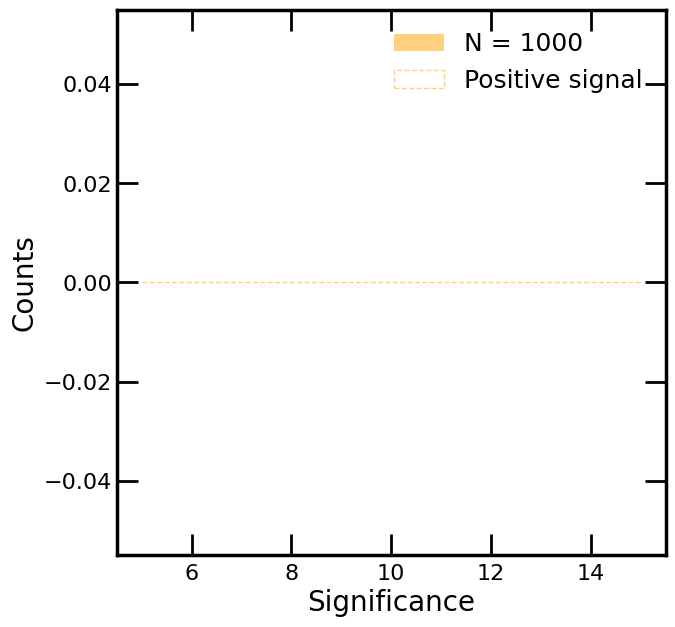

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

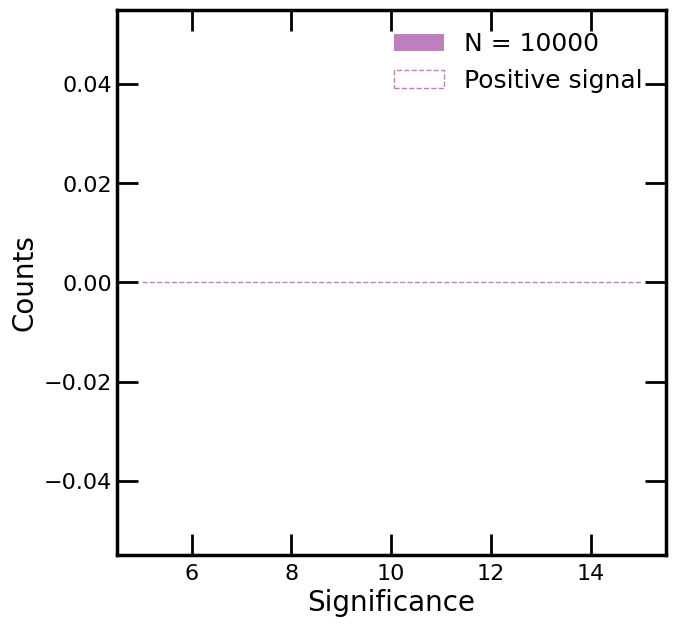

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

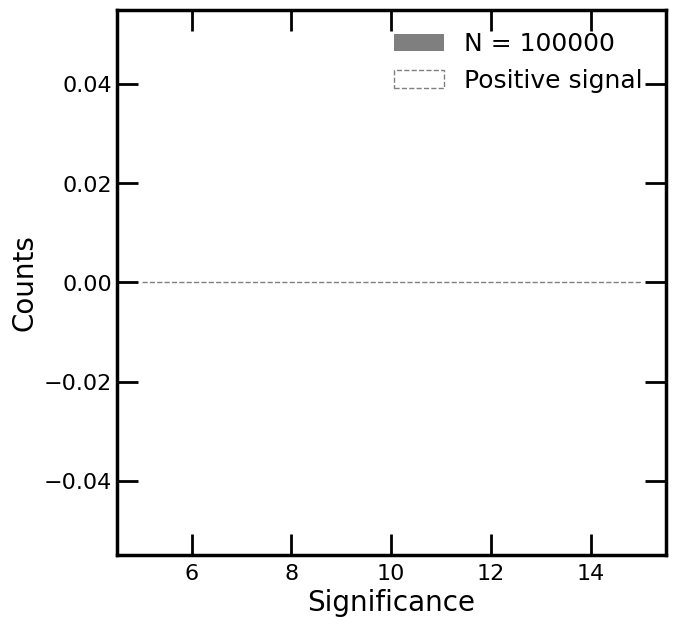

findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'serif' not found because none of the following families were found: CM
findfont: Generic family 'seri

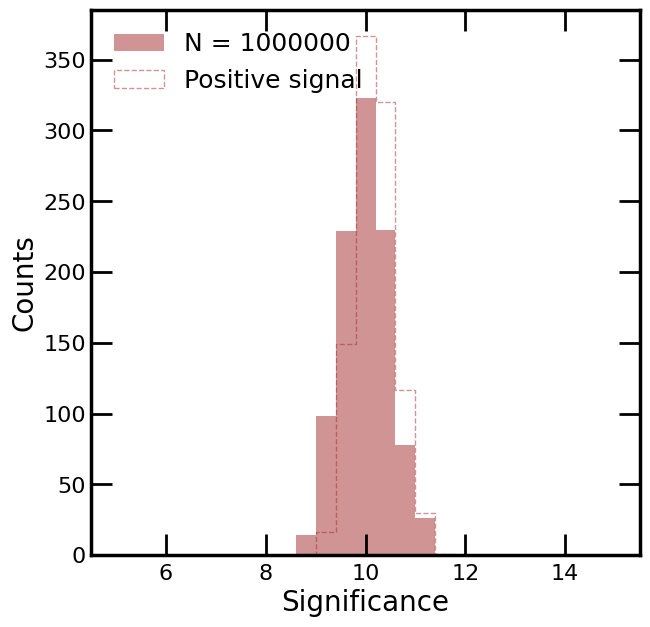

In [78]:
colors = ["red", "blue", "green", "orange", "purple", "black", "brown"]

for i in range(len(n_samples)):
    significance = signals[i,:] / np.sqrt(n_samples[i])
    positive_significance = positive_signals[i,:] / np.sqrt(n_samples[i])

    fig, ax = newplot("full", use_tex = use_latex)
    plt.hist(significance, bins = 25, range = (5, 15), color = colors[i], label = f"N = {int(n_samples[i])}",  alpha = 0.5)
    plt.hist(positive_significance, bins = 25, range = (5, 15), color = colors[i], linestyle = "--", label = "Positive signal", alpha = 0.5, histtype = "step")
    plt.legend()
    plt.xlabel("Significance")
    plt.ylabel("Counts")

plt.show()